# Xem xét việc có được vào trường đại học hay không dựa trên bộ dữ liệu sinh viên 400 mẫu có tên là binary.csv

# Yêu cầu: 
## Hãy đọc dữ liệu từ tập tin này, áp dụng Logistic Regression để thực hiện việc xác định có được vào trường đại học hay không dựa vào các thông tin như: gre, gpa, rank.
## Đọc dữ liệu, tiền xử lý dữ liệu nếu cần, trực quan hóa dữ liệu để thấy sự tương quan giữa các biến
## Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được với tỷ lệ dữ liệu test là 0.2
## Áp dụng thuật toán Logistic RegressionKiểm tra độ chính xác. Đánh giá mô hình bằng kiểm tra underfiting và overfiting
## Tìm kết quả Cho dữ liệu Test: X_now = [[600, 4, 2],[400, 3, 3]]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats

In [2]:
admit_uni = pd.read_csv('data9/Ex1_Admit_to_university/binary.csv')
admit_uni

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [3]:
admit_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [4]:
admit_uni.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

### <span style='color: red'> Univariate analysis

----------------------------- GRE -------------------------------------------
count    400.000000
mean     587.700000
std      115.516536
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

Skewness = -0.1438147091311136
Skewness = -0.3420153406732718



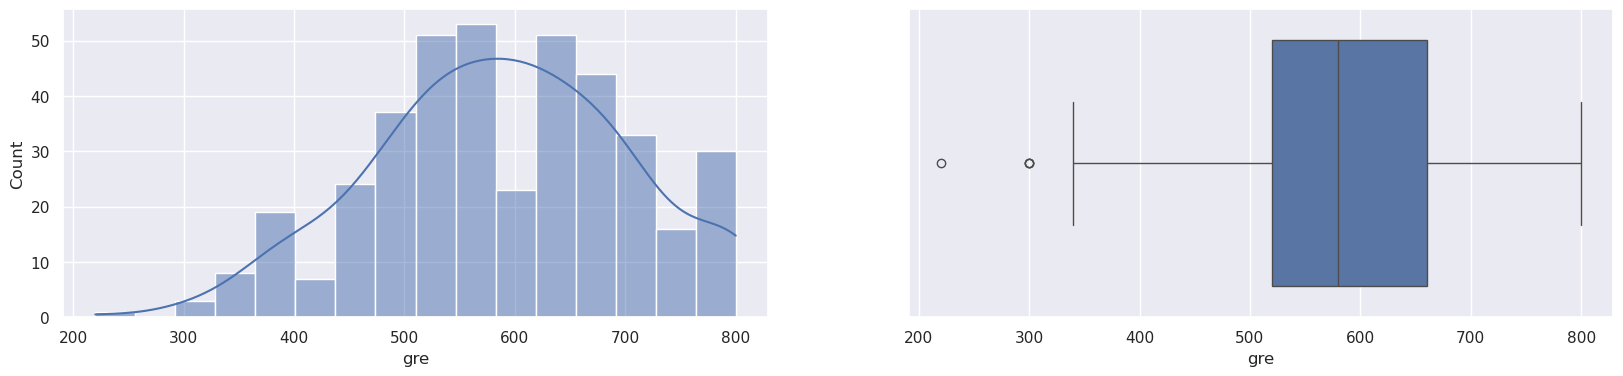


----------------------------- GPA -------------------------------------------
count    400.000000
mean       3.389900
std        0.380567
min        2.260000
25%        3.130000
50%        3.395000
75%        3.670000
max        4.000000
Name: gpa, dtype: float64

Skewness = -0.20791427762935408
Skewness = -0.5871289924005358



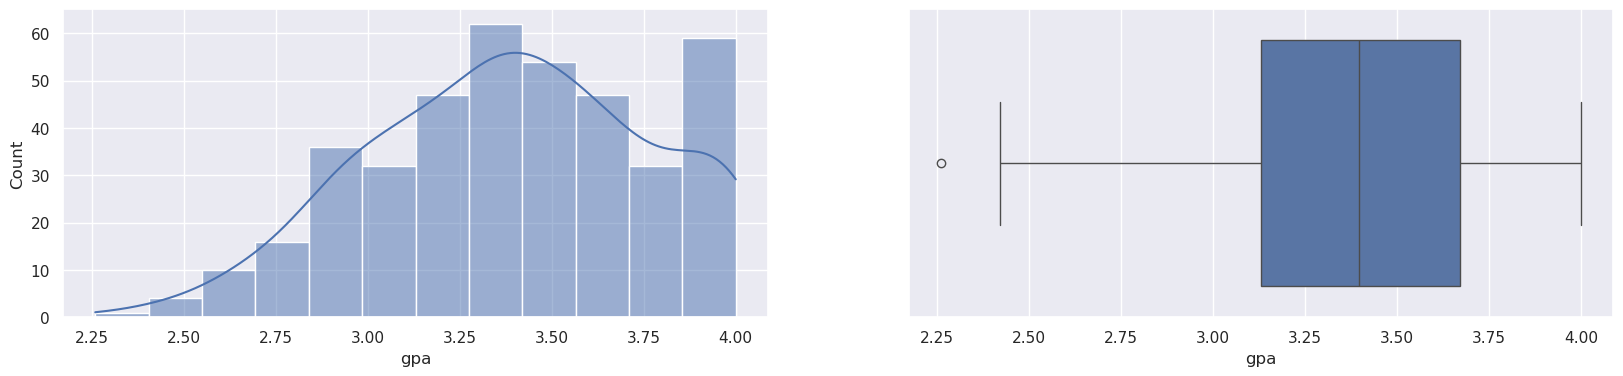


----------------------------- RANK -------------------------------------------
Unique values: [3 1 4 2]

Value counts:
 rank
2    151
3    121
4     67
1     61
Name: count, dtype: int64



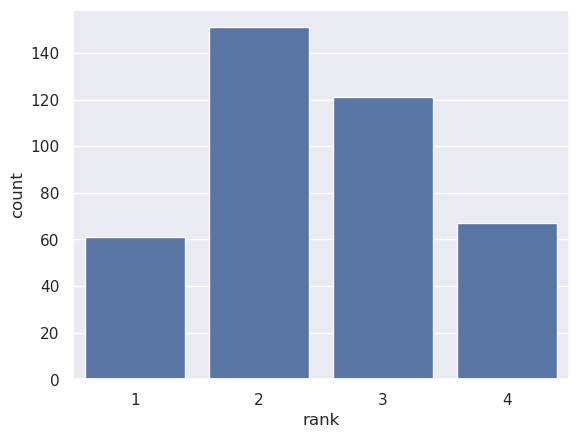


----------------------------- ADMIT -------------------------------------------
Unique values: [0 1]

Value counts:
 admit
0    273
1    127
Name: count, dtype: int64



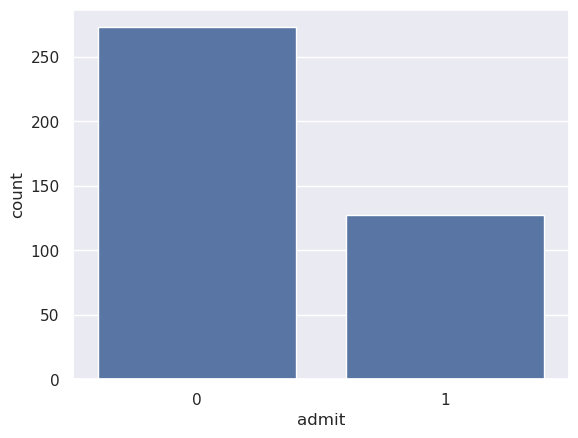

In [5]:
sbn.set_theme(style='darkgrid')

for col in ['gre', 'gpa']:
    print(f'----------------------------- {col.upper()} -------------------------------------------')
    print(admit_uni[col].describe())
    print()
    print(f'Skewness = {stats.skew(admit_uni[col])}')
    print(f'Skewness = {stats.kurtosis(admit_uni[col])}')
    print()
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sbn.histplot(admit_uni[col], kde=True)
    plt.subplot(1,2,2)
    sbn.boxplot(admit_uni[col], orient='h')
    plt.show()
    print()

for col in ['rank', 'admit']:
    print(f'----------------------------- {col.upper()} -------------------------------------------')
    print(f'Unique values: {admit_uni[col].unique()}')
    print("\nValue counts:\n",admit_uni[col].value_counts())
    print()
    sbn.barplot(admit_uni[col].value_counts())
    plt.xticks(rotation=0)
    plt.show()
    print()

### Output "admit" has imbalance between 0 and 1

### <span style='color: red'> Bi-variate analysis

------------------------------ GRE ~ GPA (continuous ~ continuous) ------------------------------------------
Correlatino matrix GRE ~ GPA:
           gre       gpa
gre  1.000000  0.384266
gpa  0.384266  1.000000

GRE~GPA correlation is weak (corr < 0.4)


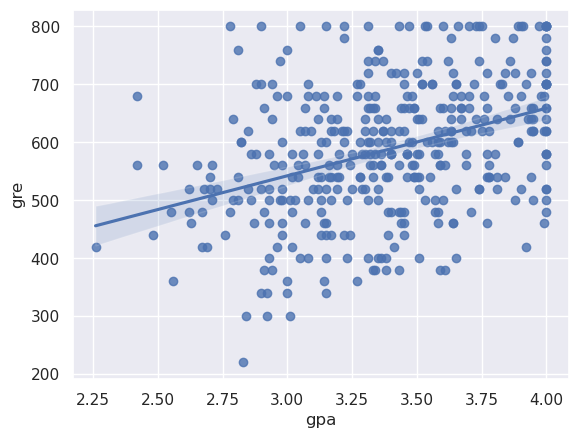

In [6]:
#GRE ~ GPA (continuous ~ continuous)
print("------------------------------ GRE ~ GPA (continuous ~ continuous) ------------------------------------------")
print("Correlatino matrix GRE ~ GPA:\n",admit_uni[['gre', 'gpa']].corr())
print()
sbn.regplot(data=admit_uni, x='gpa', y='gre');

print("GRE~GPA correlation is weak (corr < 0.4)")

------------------------------ Admit ~ Rank (categorical ~ categorical) ------------------------------------------
admit   0   1
rank         
1      28  33
2      97  54
3      93  28
4      55  12

Chi2 p-value = 1.3741330521058764e-05
Since p-value < 0.05, then RANK and ADMIT are dependent


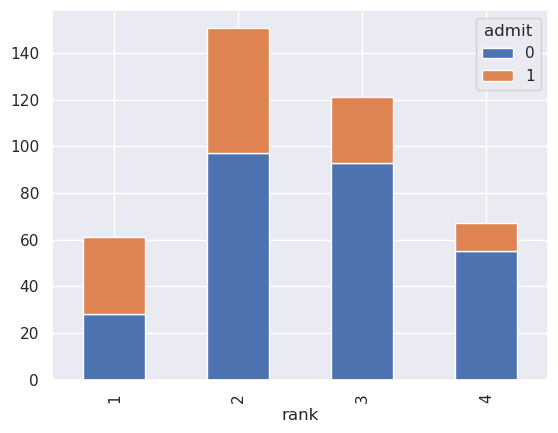

In [7]:
#Admit ~ Rank (categorical ~ categorical)
print("------------------------------ Admit ~ Rank (categorical ~ categorical) ------------------------------------------")
table_2way = pd.crosstab(admit_uni['rank'], admit_uni['admit'])
print(table_2way)

stat, p, DoF, expected = stats.chi2_contingency(table_2way)
print(f'\nChi2 p-value = {p}')
print(f'Since p-value < 0.05, then RANK and ADMIT are dependent')

table_2way.plot.bar(stacked=True)
plt.show()

------------------------- gpa ~ rank (continuous ~ categorical) ----------------------------------------


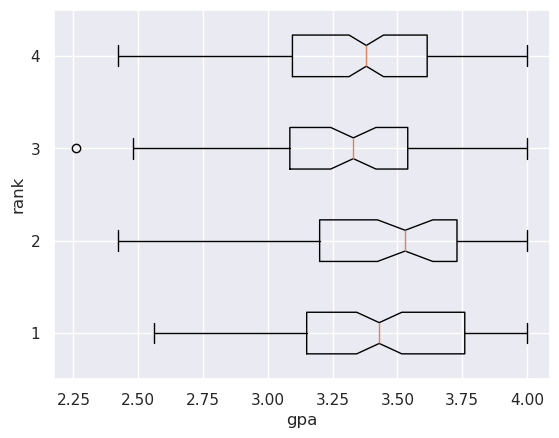


------------------------- gpa ~ admit (continuous ~ categorical) ----------------------------------------


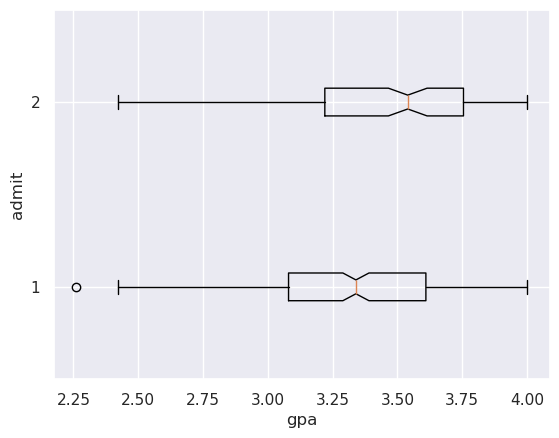


------------------------- gre ~ rank (continuous ~ categorical) ----------------------------------------


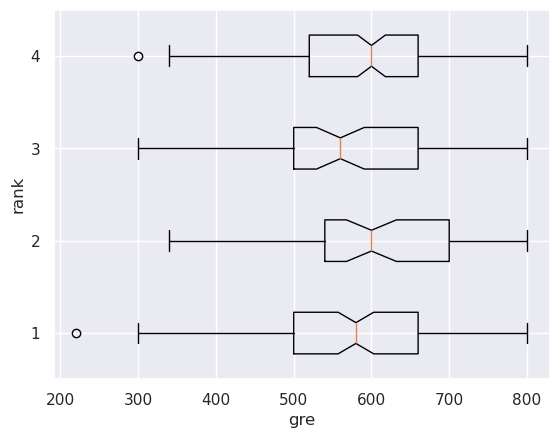


------------------------- gre ~ admit (continuous ~ categorical) ----------------------------------------


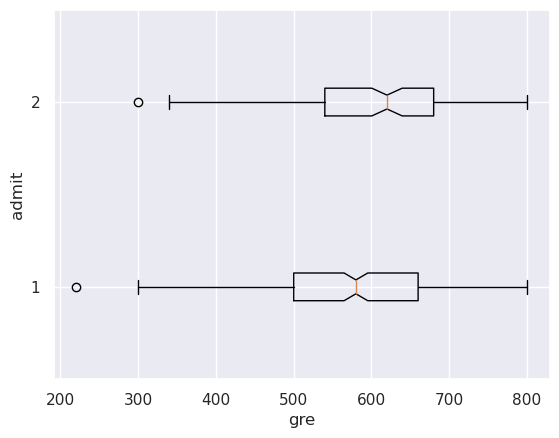

In [8]:
conti_categ_pairs = [(conti, categ) for conti in ['gpa', 'gre'] for categ in ['rank', 'admit'] ]

for pair in conti_categ_pairs:
    conti, categ = pair
    print(f"------------------------- {conti} ~ {categ} (continuous ~ categorical) ----------------------------------------")
    grouped_data = [ admit_uni.loc[admit_uni[categ] == categ_values, conti]  for categ_values in admit_uni[categ].unique() ]
    plt.boxplot(grouped_data, notch=True, vert=False)
    plt.xlabel(conti)
    plt.ylabel(categ)
    plt.show()
    print()

### <span style='color: red'> Train Logistic Regression model with original dataset (unscaled, imbalanced)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [10]:
x = admit_uni.drop('admit', axis=1)
y = admit_uni['admit']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Accuracy score of LogReg model on test set: 0.7125

Confusion matrix of LogReg model:
 [[49  2]
 [21  8]]

Classification report of LogReg model:
               precision    recall  f1-score   support

           0       0.70      0.96      0.81        51
           1       0.80      0.28      0.41        29

    accuracy                           0.71        80
   macro avg       0.75      0.62      0.61        80
weighted avg       0.74      0.71      0.67        80


ROC_AUC score of LogReg model: 0.6822177146720756



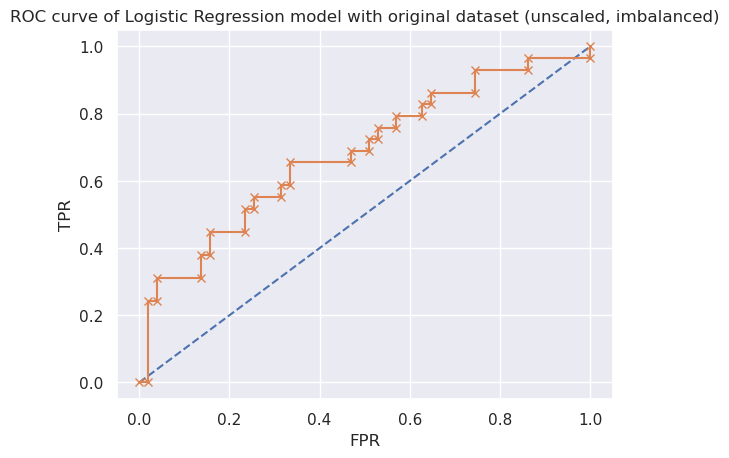

In [13]:
logreg = LogisticRegression(max_iter=500, solver='liblinear').fit(x_train, y_train)

y_pred_test = logreg.predict(x_test)
y_proba_test = logreg.predict_proba(x_test)

print(f'Accuracy score of LogReg model on test set: {logreg.score(x_test, y_test)}')
print()
print(f'Confusion matrix of LogReg model:\n {confusion_matrix(y_test, y_pred_test)}')
print()
print(f'Classification report of LogReg model:\n {classification_report(y_test, y_pred_test)}')
print()
print(f'ROC_AUC score of LogReg model: {roc_auc_score(y_test, y_proba_test[:,1])}')
print()

fpr, tpr, threshold = roc_curve(y_test, y_proba_test[:,1])
plt.plot([0,1], [0,1], linestyle='--', label='Reference line')
plt.plot(fpr, tpr, marker='x', label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve of Logistic Regression model with original dataset (unscaled, imbalanced)')
plt.show()

### Recal of class 1 is low (0.28), ROC_AUC score not high, ROC curve closed to reference => BAD

### <span style='color: red'> Train Logistic Regression model with original dataset (unscaled, imbalanced)

In [14]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline #Use imblearn pipeline if want to use SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [15]:
pipe_model = Pipeline([
    ("OverSampling", SMOTE(random_state=3)),
    ("Minmax scale", MinMaxScaler()),
    ("Logistic Regression", LogisticRegression(max_iter=500, solver='liblinear'))
])

pipe_model.fit(x_train, y_train)

Pipeline(steps=[('OverSampling', SMOTE(random_state=3)),
                ('Minmax scale', MinMaxScaler()),
                ('Logistic Regression',
                 LogisticRegression(max_iter=500, solver='liblinear'))])

Accuracy score of LogReg model Scaled OverSampled on test set: 0.5375

Confusion matrix of LogReg model Scaled OverSampled:
 [[20 31]
 [ 6 23]]

Classification report of LogReg model Scaled OverSampled:
               precision    recall  f1-score   support

           0       0.77      0.39      0.52        51
           1       0.43      0.79      0.55        29

    accuracy                           0.54        80
   macro avg       0.60      0.59      0.54        80
weighted avg       0.64      0.54      0.53        80


ROC_AUC score of LogReg model Scaled OverSampled: 0.6713995943204869



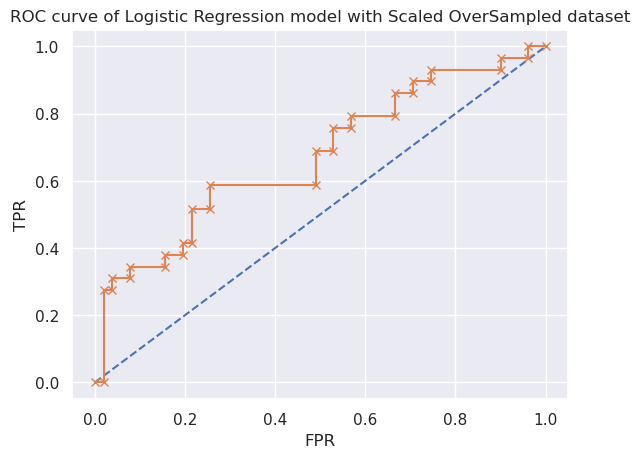

In [16]:
y_pred_test_processed = pipe_model.predict(x_test)
y_proba_test_processed = pipe_model.predict_proba(x_test)

print(f'Accuracy score of LogReg model Scaled OverSampled on test set: {pipe_model.score(x_test, y_test)}')
print()
print(f'Confusion matrix of LogReg model Scaled OverSampled:\n {confusion_matrix(y_test, y_pred_test_processed)}')
print()
print(f'Classification report of LogReg model Scaled OverSampled:\n {classification_report(y_test, y_pred_test_processed)}')
print()
print(f'ROC_AUC score of LogReg model Scaled OverSampled: {roc_auc_score(y_test, y_proba_test_processed[:,1])}')
print()

fpr_processed, tpr_processed, threshold_processed = roc_curve(y_test, y_proba_test_processed[:,1])
plt.plot([0,1], [0,1], linestyle='--', label='Reference line')
plt.plot(fpr_processed, tpr_processed, marker='x', label='ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve of Logistic Regression model with Scaled OverSampled dataset')
plt.show()

## <span style='color:red'>Tìm kết quả Cho dữ liệu Test: X_now = [[600, 4, 2],[400, 3, 3]]

In [17]:
X_now = [[600, 4, 2],[400, 3, 3]]
Y_now = pipe_model.predict(X_now)
for i in range(len(X_now)):
    print(f'GRE: {X_now[i][0]} ____ GPA: {X_now[i][1]} _____ RANK: {X_now[i][2]} => ADMIT = {Y_now[i]}')

GRE: 600 ____ GPA: 4 _____ RANK: 2 => ADMIT = 1
GRE: 400 ____ GPA: 3 _____ RANK: 3 => ADMIT = 0


/home/long/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
